# Data Cleaning

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
dim_cities = pd.read_csv('/content/drive/MyDrive/0.Projects/Code Basics/Codex Energy Drink/Dataset/dim_cities.csv')
dim_repondents = pd.read_csv('/content/drive/MyDrive/0.Projects/Code Basics/Codex Energy Drink/Dataset/dim_repondents.csv')
fact_survey_responses = pd.read_csv('/content/drive/MyDrive/0.Projects/Code Basics/Codex Energy Drink/Dataset/fact_survey_responses.csv')


In [7]:
# Merging the all the data into sigal dataframe
df = pd.merge(dim_cities ,dim_repondents, on=['City_ID', 'City_ID'])
df = pd.merge(df,fact_survey_responses,on =['Respondent_ID','Respondent_ID'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   City_ID                         10000 non-null  object
 1   City                            10000 non-null  object
 2   Tier                            10000 non-null  object
 3   Respondent_ID                   10000 non-null  int64 
 4   Name                            10000 non-null  object
 5   Age                             10000 non-null  object
 6   Gender                          10000 non-null  object
 7   Response_ID                     10000 non-null  int64 
 8   Consume_frequency               10000 non-null  object
 9   Consume_time                    10000 non-null  object
 10  Consume_reason                  10000 non-null  object
 11  Heard_before                    10000 non-null  object
 12  Brand_perception                10000 non-null 

In [9]:
df.describe()

,Respondent_ID,Response_ID,Taste_experience
count,10000.00000,10000.00000,10000.000000
mean,125030.50000,108000.50000,3.281900
std,2886.89568,2886.89568,1.239752
min,120031.00000,103001.00000,1.000000
25%,122530.75000,105500.75000,2.000000
50%,125030.50000,108000.50000,3.000000
75%,127530.25000,110500.25000,4.000000
max,130030.00000,113000.00000,5.000000


# 1. Demographic Insights:-

Who prefers energy drink more? (male/female/non-binary?)



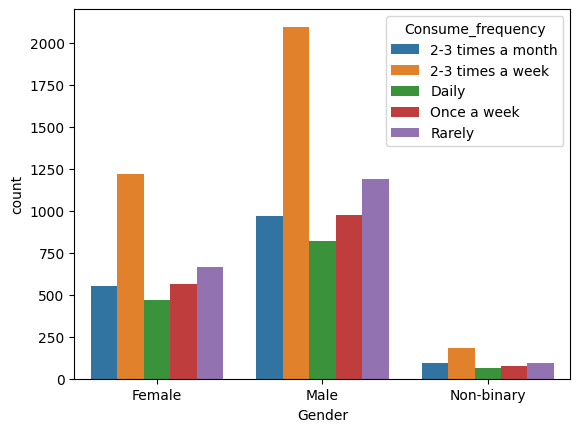

In [10]:
sns.barplot(x = 'Gender' ,
            y = 'count' ,
            hue =  "Consume_frequency",
            data = df.groupby(['Gender', 'Consume_frequency']).size().reset_index(name='count'))
plt.show()

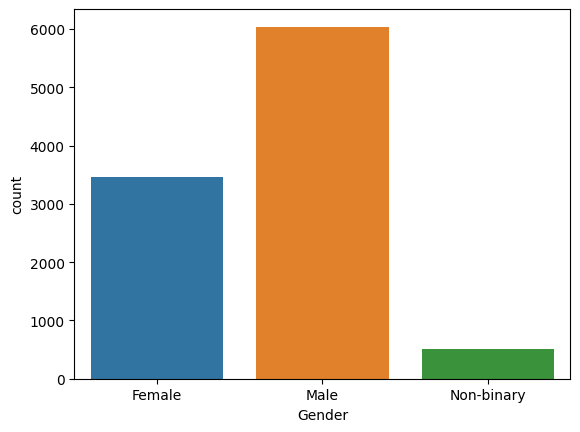

In [11]:
sns.barplot(x = 'Gender',
            y = 'count',
            data = df.groupby(['Gender']).size().reset_index(name='count'))
plt.show()

Insights :-
* Male perfer more as compair to another to gender

Q2-Which age group prefers energy drinks more?

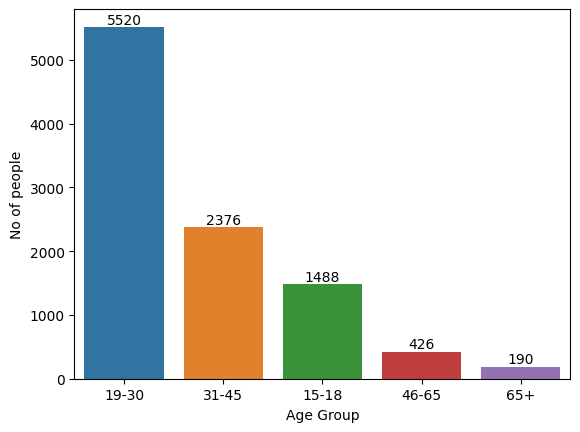

In [12]:
data = df.Age.value_counts().reset_index()
sns.barplot(x="index", y="Age", data = data)
plt.xlabel("Age Group")
plt.ylabel("No of people")
for index, row in data.iterrows():
    plt.text(index, row['Age'], row['Age'], ha='center', va='bottom')

plt.show()

Insights :-
* The people between Age group from 19 to 30 years perfer enery drinks

Q3-Which type of marketing reaches the most Youth (15-30)?

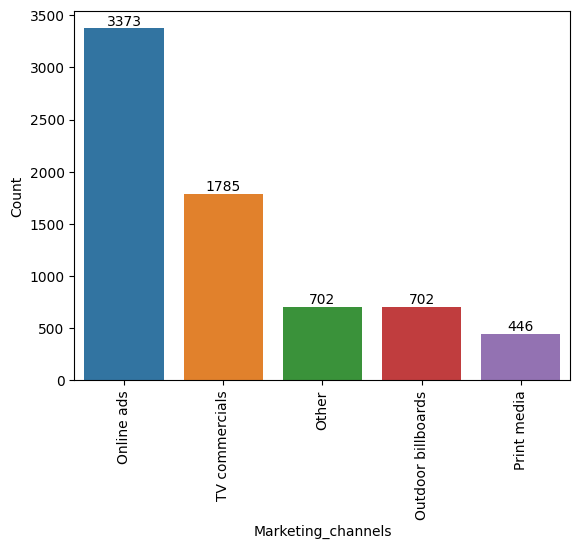

In [13]:
data = df[(df.Age == "19-30") | (df.Age == "15-18")]
data = data.Marketing_channels.value_counts().reset_index()

sns.barplot(x="index", y="Marketing_channels", data = data)
plt.xlabel("Marketing_channels")
plt.ylabel("Count")
for index, row in data.iterrows():
    plt.text(index, row['Marketing_channels'], row['Marketing_channels'], ha='center', va='bottom')

plt.xticks(rotation=90)
plt.show()

Insights :-
* OnLine adds

# 2. Consumer Preferences

Q1-What are the preferred ingredients of energy drinks among respondents?

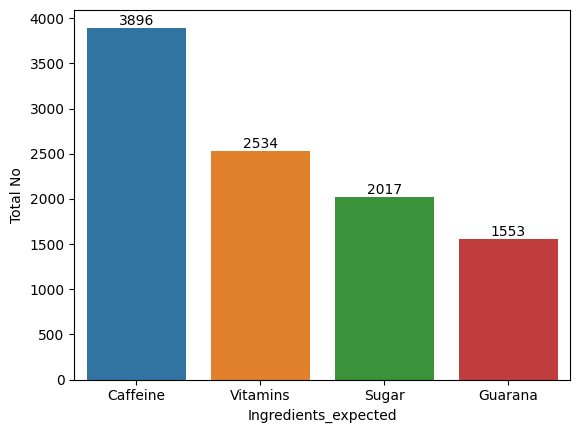

In [14]:
data = df.Ingredients_expected.value_counts().reset_index()

sns.barplot(x="index", y="Ingredients_expected", data = data)
plt.xlabel("Ingredients_expected")
plt.ylabel("Total No")
for index, row in data.iterrows():
    plt.text(index, row['Ingredients_expected'], row['Ingredients_expected'], ha='center', va='bottom')

plt.show()

Insights :-
* Most of the people as asking for Caffeine as it give u caffeine rush after all we are taking about enery drink here

Q2-What packaging preferences do respondents have for energy drinks?

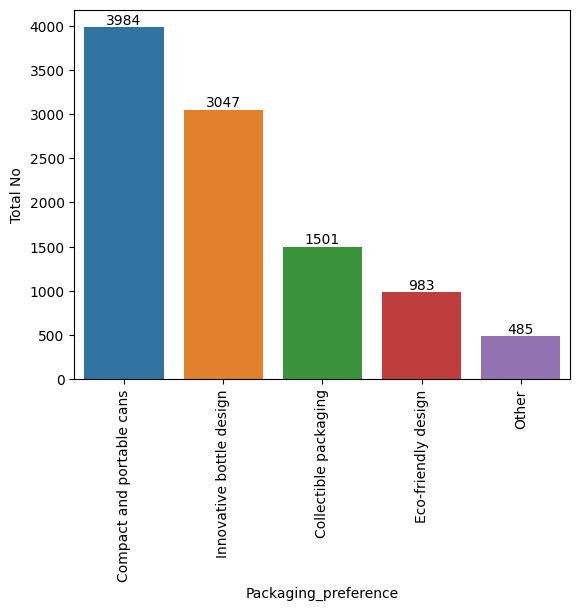

In [15]:
data = df.Packaging_preference.value_counts().reset_index()

sns.barplot(x="index", y="Packaging_preference", data = data)
plt.xlabel("Packaging_preference")
plt.ylabel("Total No")
for index, row in data.iterrows():
    plt.text(index, row['Packaging_preference'], row['Packaging_preference'], ha='center', va='bottom')

# plt.figure(figsize=(70, 30))
plt.xticks(rotation=90)
plt.show()

As for pakaging perference of the coustumer:-
1.   Compact and potable cans.
2.   Innovative Bottle Designs.

These two have most votes



# 3. Competition Analysis:

Q1- Who are the current market leaders?

In [16]:
df.Current_brands.value_counts().reset_index()

,index,Current_brands
0,Cola-Coka,2538
1,Bepsi,2112
2,Gangster,1854
3,Blue Bull,1058
4,CodeX,980
5,Sky 9,979
6,Others,479


Insights :-
* Current Market leader are Cola-Coka and Bepsi

What are the primary reasons consumers prefer those brands over ours?

In [17]:
data =df.Reasons_for_choosing_brands.value_counts().reset_index()
y = data.Reasons_for_choosing_brands.to_list()
x = data['index'].to_list()

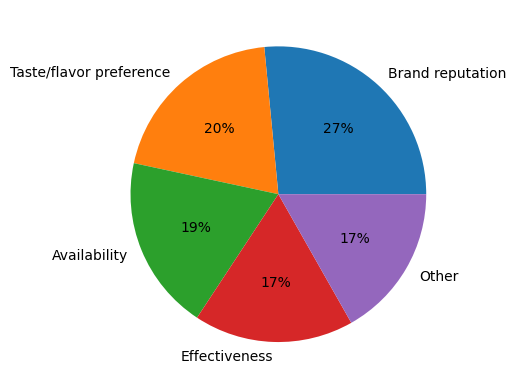

In [18]:
plt.pie(y, labels=x, autopct='%.0f%%')
plt.show()

Insights :-
*   Reasons for choosing other brands are mainly Their Brand Reputation and their taste


# 4. Marketing Channels and Brand Awareness:

Q- Which marketing channel can be used to reach more customers?

Q-How effective are different marketing strategies and channels in reaching our
customers?


In [19]:
# marketing channels or platforms the people come across for energy drink advertisements
df.Marketing_channels.value_counts().reset_index()

,index,Marketing_channels
0,Online ads,4020
1,TV commercials,2688
2,Outdoor billboards,1226
3,Other,1225
4,Print media,841


In [20]:
# Typically Purchase location for energy drinks
df.Purchase_location.value_counts().reset_index()

,index,Purchase_location
0,Supermarkets,4494
1,Online retailers,2550
2,Gyms and fitness centers,1464
3,Local stores,813
4,Other,679


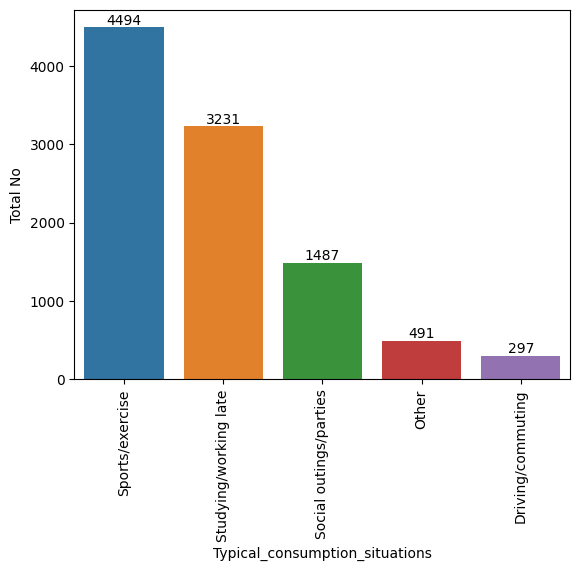

In [21]:
# Typical consumption situations
data = df.Typical_consumption_situations.value_counts().reset_index()

sns.barplot(x="index", y="Typical_consumption_situations", data = data)
plt.xlabel("Typical_consumption_situations")
plt.ylabel("Total No")
for index, row in data.iterrows():
    plt.text(index, row['Typical_consumption_situations'], row['Typical_consumption_situations'], ha='center', va='bottom')

plt.xticks(rotation=90)
plt.show()

In [22]:
# what are the main reasons preventing you from trying our product?
data = df[df.Tried_before == "No"]
data = data.Reasons_preventing_trying.value_counts().reset_index()
data.rename(columns = {'Reasons_preventing_trying':'Total_No_people','index':'Reasons_preventing_trying'}, inplace = True)
data

,Reasons_preventing_trying,Total_No_people
0,Health concerns,1197
1,Not interested in energy drinks,1179
2,Not available locally,1165
3,Unfamiliar with the brand,1030
4,Other,548


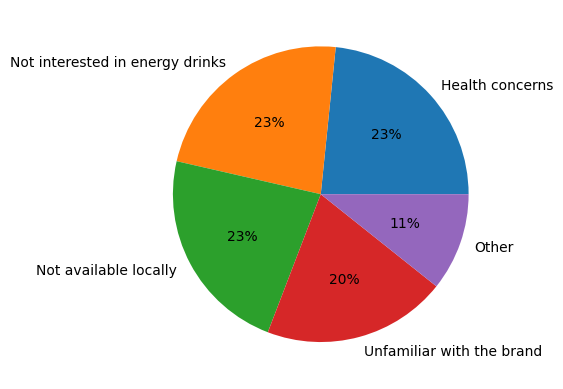

In [23]:
y = data.Total_No_people.to_list()
x = data.Reasons_preventing_trying.to_list()
plt.pie(y, labels=x, autopct='%.0f%%')
plt.show()

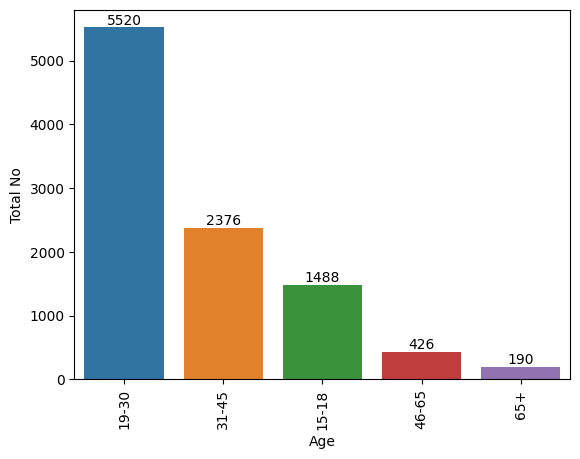

In [24]:
data =df[df.Reasons_preventing_trying != 'Not interested in energy drinks	']
data = df.Age.value_counts().reset_index()
sns.barplot(x="index", y="Age", data = data)
plt.xlabel("Age")
plt.ylabel("Total No")
for index, row in data.iterrows():
    plt.text(index, row['Age'], row['Age'], ha='center', va='bottom')

# plt.figure(figsize=(70, 30))
plt.xticks(rotation=90)
plt.show()

Insights :-

*   The Online Advertising is the best place for Advertising as most of the potential cousumer base are 19-30 age group.
*   These age group people spend most of their time on social media so best and cheaper way of adverting is Social media we have hire social media fitness influencer or actor who is more into fitness like "John abraham" ,"ranveer singh" or "Vidyut Jammwal"

*   For targeting the 15-18 age group we can go for you tubers as teaneger easily infuse with their favourite you tubers.

*   We have to also focus on offline marking like in malls and supermarkets as most of people puschuse enery drink from Supermarket with the combination of online and offline marking the persone is most likily to try our product.






# 5. Brand Penetration

Q-What do people think about our brand? (overall rating)

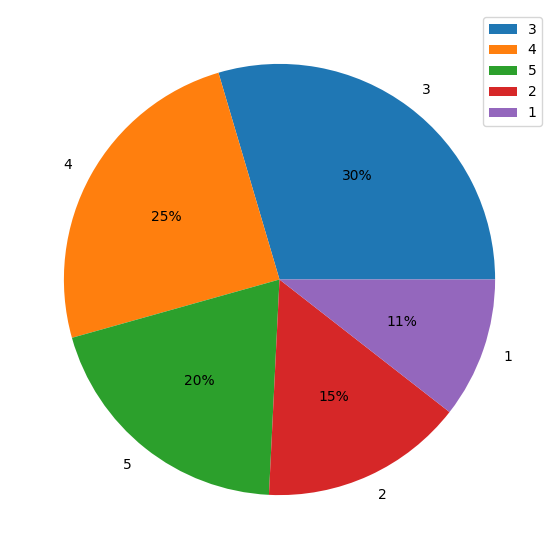

In [25]:
Taste_experience = df['Taste_experience'].value_counts().reset_index()
Taste_experience.rename(columns={'Taste_experience': 'Count', 'index': 'Taste_experience'}, inplace=True)

x = Taste_experience['Taste_experience'].tolist()
y = Taste_experience['Count'].tolist()
plt.figure(figsize=(7,7))
plt.pie(y, labels=x, autopct='%.0f%%')
plt.legend()  # Use plt.legend(), not plt.legends()
plt.show()


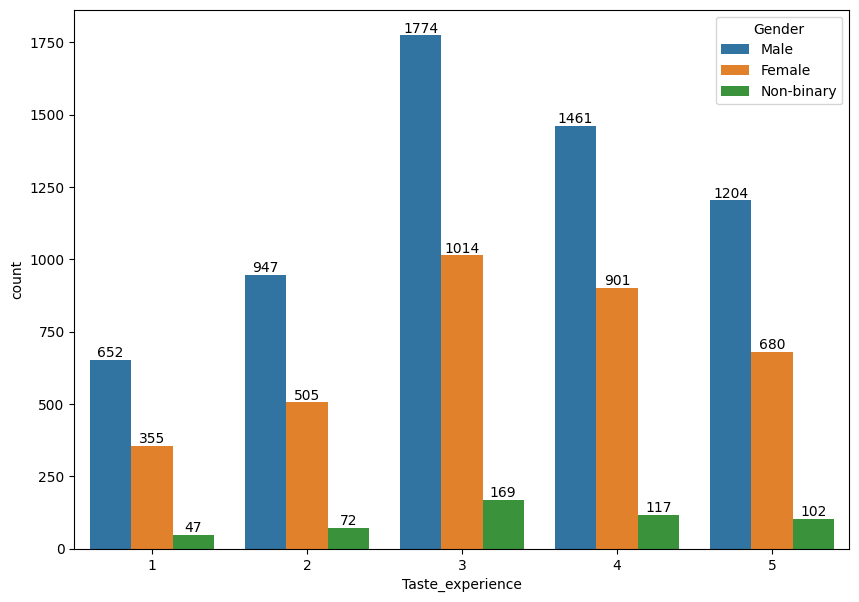

In [26]:
df.groupby('Taste_experience')['Gender'].value_counts().reset_index(name='count')

plt.figure(figsize=(10,7))
graph = sns.barplot( x = "Taste_experience",
            y = "count",
             hue = "Gender",
             data = df.groupby('Taste_experience')['Gender'].value_counts().reset_index(name='count'))

for i in range (len(df.Gender.unique())):
  graph.bar_label(graph.containers[i])

plt.show()

In [27]:
# What do you think of the brand name/logo/design
data = df.Brand_perception.value_counts().reset_index(name ='count')
data.rename(columns={"index":"Brand_perception"}, inplace=True)
data

,Brand_perception,count
0,Neutral,5974
1,Positive,2257
2,Negative,1769


Insights :-
*   As we see that most of tast rating is above 3 and 4 and 5 rating is more than the 1 and 2 rating this shows that the people like the taste of our energy drink.
*   Over overall all rating is average



Q- Which cities do we need to focus more on?

In [28]:
data =df.City.value_counts().reset_index()
data.rename(columns={'City':'Total_Count',"index":"City"}, inplace = True )

In [29]:
df_filtered_good_tried_before = df[(df['Taste_experience'] != 1) & (df['Taste_experience'] != 2)]
df_filtered_good_tried_before = df_filtered_good_tried_before.City.value_counts().reset_index()

df_filtered_good_tried_before.rename(columns={'City':'Total_Count_Good_rating',"index":"City"}, inplace = True )

In [30]:
City_rating = pd.merge(data ,df_filtered_good_tried_before, on=['City', 'City'])

In [31]:
City_rating["Good Rating Percentage"] = 1

for i in range(City_rating.shape[0]):
  City_rating.loc[i,"Good Rating Percentage"] = str(round(City_rating.loc[i,"Total_Count_Good_rating"] / City_rating.loc[i,"Total_Count"]*100,0)) + "%"

City_rating

,City,Total_Count,Total_Count_Good_rating,Good Rating Percentage
0,Bangalore,2828,2127,75.0%
1,Hyderabad,1833,1365,74.0%
2,Mumbai,1510,1114,74.0%
3,Chennai,937,679,72.0%
4,Pune,906,678,75.0%
5,Kolkata,566,404,71.0%
6,Ahmedabad,456,346,76.0%
7,Delhi,429,313,73.0%
8,Jaipur,360,263,73.0%
9,Lucknow,175,133,76.0%


Insights :-
*   Bangalore ,Hyderabad ,Mumbai most of the people who took the survay are from these city and they seems to like our product so initially lets focus these city and we can expand towards the northern side like Delhi ,Jaipur m Lucknow.



# 6. Purchase Behavior:

A-Where do respondents prefer to purchase energy drinks?

B-What are the typical consumption situations for energy
drinks among respondents?

C-What factors influence respondents' purchase decisions, such as price range and limited edition packaging?

In [32]:
Purchase_location = df.Purchase_location.value_counts().reset_index()
Purchase_location.rename(columns ={'Purchase_location':"Count",'index':'Purchase Location'},inplace = True)
Purchase_location

,Purchase Location,Count
0,Supermarkets,4494
1,Online retailers,2550
2,Gyms and fitness centers,1464
3,Local stores,813
4,Other,679


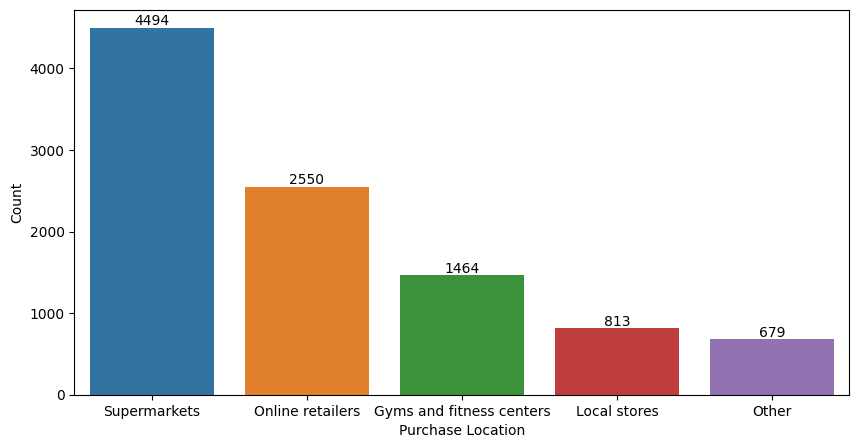

In [33]:
plt.figure(figsize=(10,5))
Purchase_location_graph = sns.barplot(x="Purchase Location",
            y='Count',
            data = Purchase_location)

Purchase_location_graph.bar_label(Purchase_location_graph.containers[0])
plt.show()

Insights :-
*   Most of the respondents/people purches drinks from Supermarkets and Online retailers.




In [34]:
Typical_consumption_situations = df.Typical_consumption_situations.value_counts().reset_index()
Typical_consumption_situations.rename(columns ={'Typical_consumption_situations':'Count',"index":"Typical_consumption_situations"},inplace = True)
Typical_consumption_situations

,Typical_consumption_situations,Count
0,Sports/exercise,4494
1,Studying/working late,3231
2,Social outings/parties,1487
3,Other,491
4,Driving/commuting,297


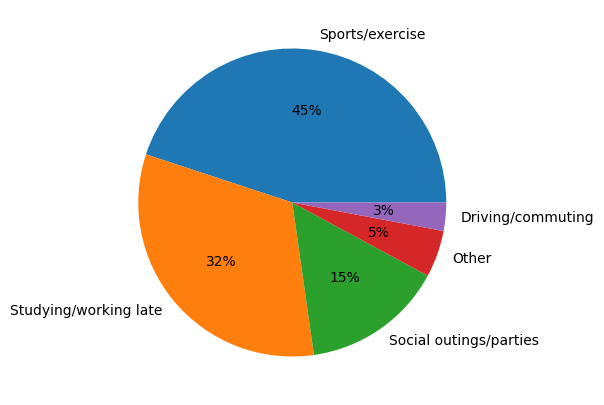

In [35]:
x = Typical_consumption_situations['Typical_consumption_situations'].to_list()
y = Typical_consumption_situations['Count'].to_list()

plt.figure(figsize=(5,5))
plt.pie(y, labels=x, autopct='%.0f%%')
# plt.legend()  # Use plt.legend(), not plt.legends()
plt.show()

Insights :-

*   Typical Consumption Situations are when people doing some kind of Exercise/Sports and when they need to focus in Studying/working late.



In [36]:
Packaging_preference = df.Packaging_preference.value_counts().reset_index()
Packaging_preference.rename(columns = {'Packaging_preference': 'Count','index':"Packaging_preference"},inplace = True)
Packaging_preference

,Packaging_preference,Count
0,Compact and portable cans,3984
1,Innovative bottle design,3047
2,Collectible packaging,1501
3,Eco-friendly design,983
4,Other,485


In [37]:
Price_range = df.Price_range.value_counts().reset_index()
Price_range.rename(columns = {'Price_range':"Count",'index':'Price_range'},inplace = True)
Price_range

,Price_range,Count
0,50-99,4288
1,100-150,3142
2,Above 150,1561
3,Below 50,1009


In [38]:
Limited_edition_packaging = df.Limited_edition_packaging.value_counts().reset_index()
Limited_edition_packaging.rename(columns = {'Limited_edition_packaging':"Count",'index':'Limited_edition_packaging'},inplace = True)
Limited_edition_packaging

,Limited_edition_packaging,Count
0,No,4023
1,Yes,3946
2,Not Sure,2031


In [39]:
Interest_in_natural_or_organic = df.Interest_in_natural_or_organic.value_counts().reset_index()
Interest_in_natural_or_organic.rename(columns = {'Interest_in_natural_or_organic':"Count",'index':'Interest_in_natural_or_organic'},inplace = True)
Interest_in_natural_or_organic

,Interest_in_natural_or_organic,Count
0,Yes,4983
1,No,3062
2,Not Sure,1955


In [40]:
Ingredients_expected = df.Ingredients_expected.value_counts().reset_index()
Ingredients_expected.rename(columns = {'Ingredients_expected':"Count",'index':'Ingredients_expected'},inplace = True)
Ingredients_expected

,Ingredients_expected,Count
0,Caffeine,3896
1,Vitamins,2534
2,Sugar,2017
3,Guarana,1553


In [41]:
Improvements_desired = df.Improvements_desired.value_counts().reset_index()
Improvements_desired.rename(columns = {'Improvements_desired':"Count",'index':'Improvements_desired'},inplace = True)
Improvements_desired

,Improvements_desired,Count
0,Reduced sugar content,2995
1,More natural ingredients,2498
2,Wider range of flavors,2037
3,Healthier alternatives,1472
4,Other,998


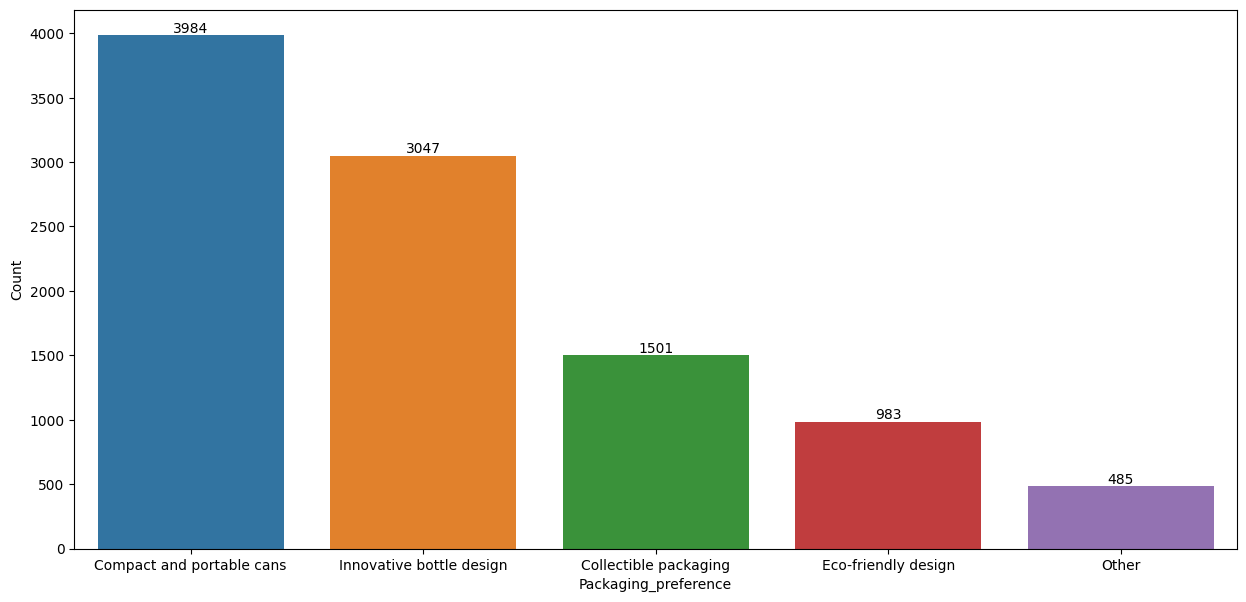

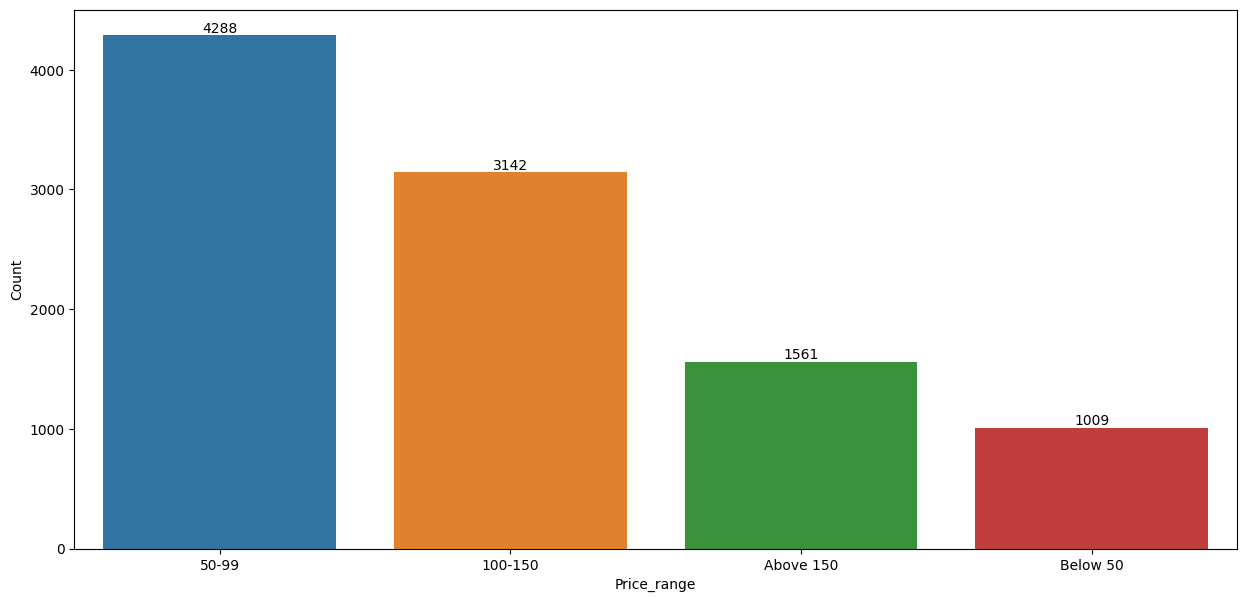

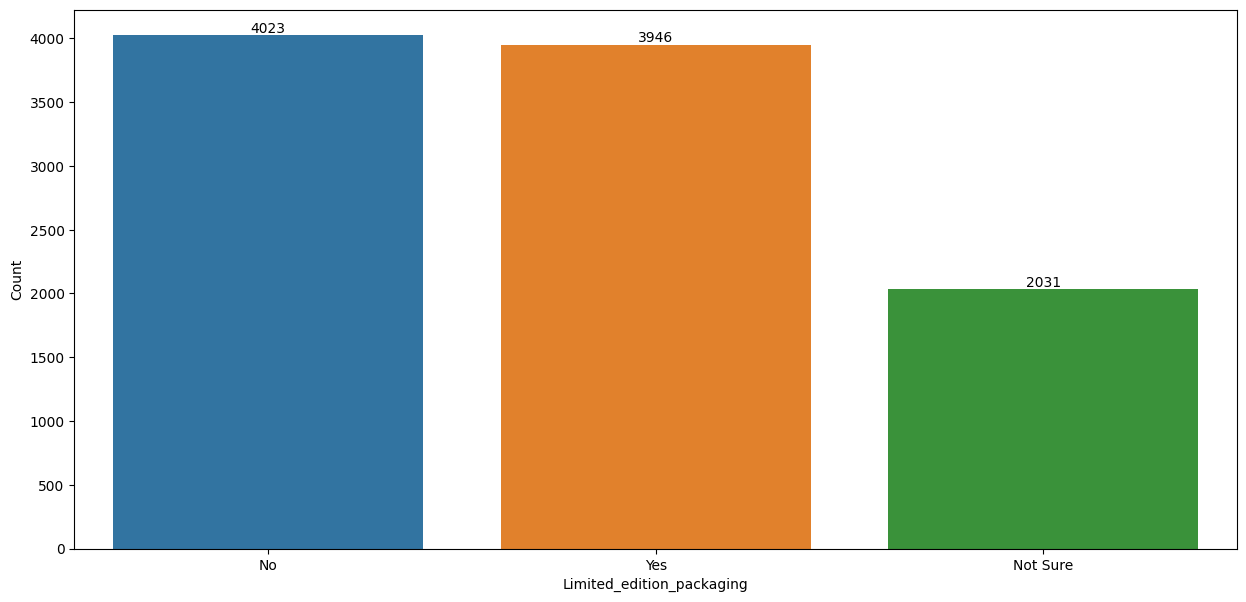

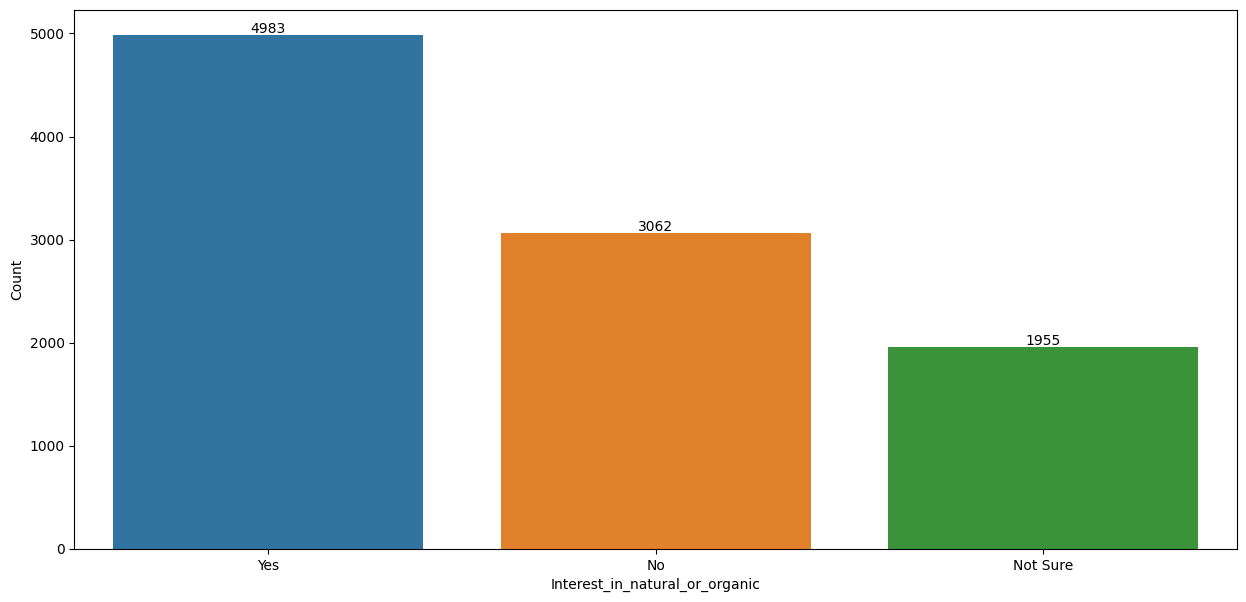

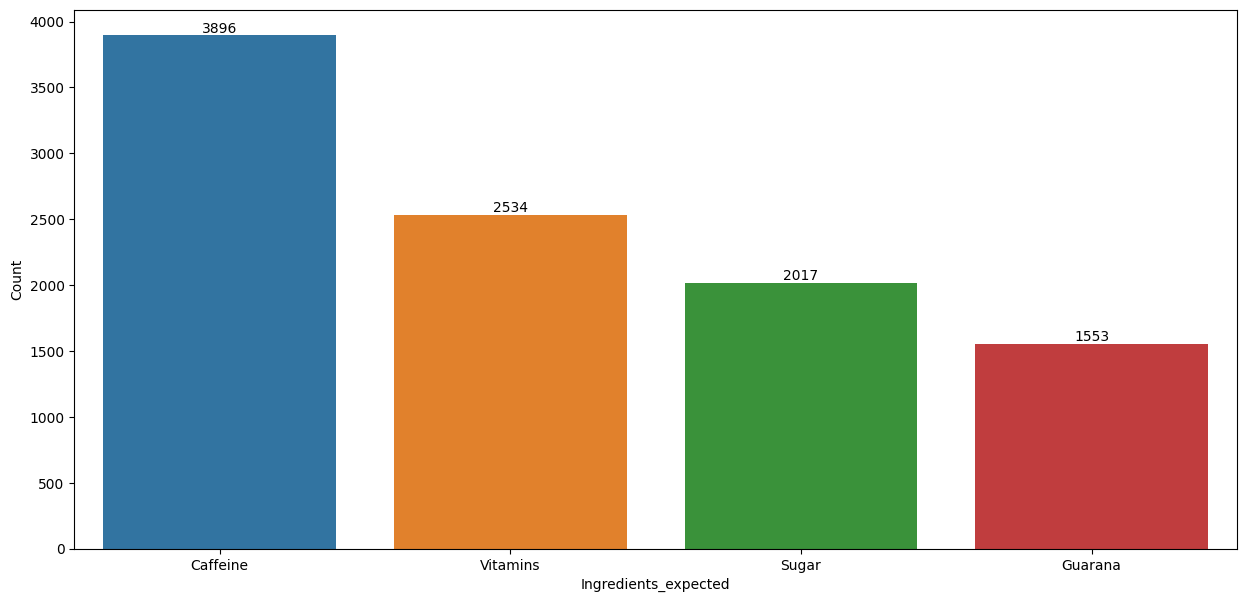

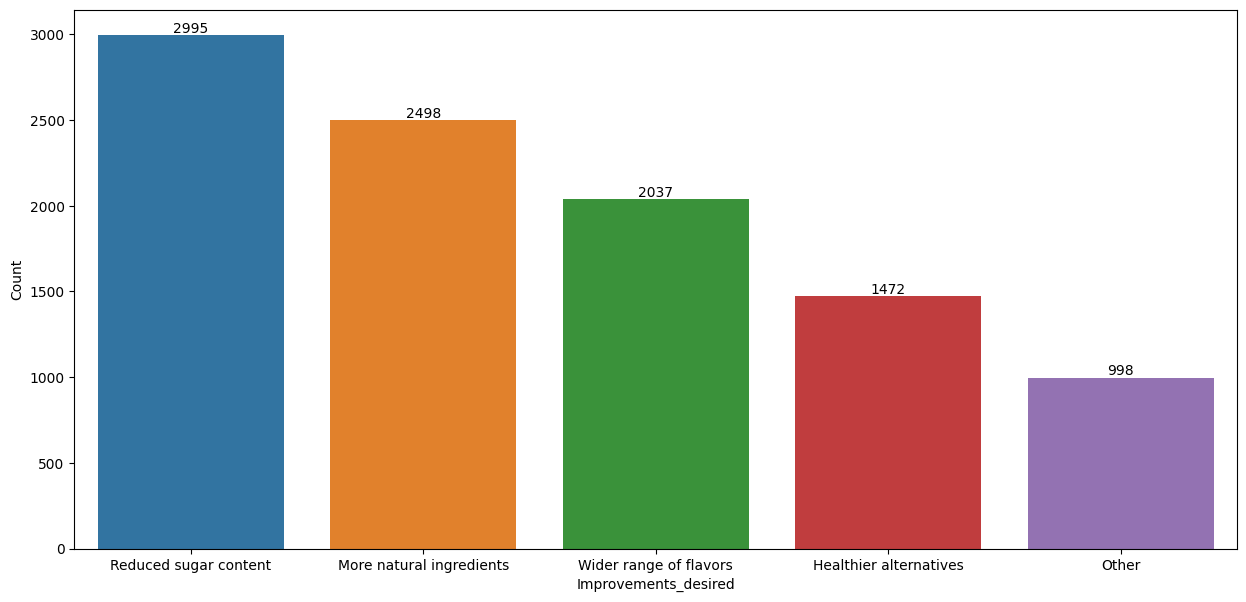

In [42]:
lis1 = [Packaging_preference, Price_range, Limited_edition_packaging, Interest_in_natural_or_organic,Ingredients_expected, Improvements_desired]
lis2 = ['Packaging_preference_graph', 'Price_range_graph', 'Limited_edition_packaging_graph', 'Interest_in_natural_or_organic_graph','Ingredients_expected_graph', 'Improvements_desired_graph']
for i in range (len(lis1)):
  plt.figure(figsize = (15,7))
  name = lis2[i].split('_graph')[0]
  lis2[i] = sns.barplot( x = name,y = 'Count' ,data = lis1[i])
  lis2[i].bar_label(lis2[i].containers[0])
  # plt.xticks(rotation=90)
  plt.show()

The factors that effects the purches bevious of people are:
*   Price -below 150
*   Packaging - Compact and portable cans with Innovative bottle design.
*   Oraganic Contants of the engery drinks specially caffeine with Reduced sugur as most of the cousmers cosume during workout and studying



# 7. Product Development

Which area of business should we focus more on our product development?
(Branding/taste/availability)

In [43]:
Heard_before = df.Heard_before.value_counts().reset_index()

In [44]:
Taste_experience['%'] = 1
for i in range (Taste_experience.shape[0]):
  Taste_experience.loc[i,"%"] = str(round(Taste_experience.loc[i,"Count"]/df.shape[0]*100,0)) + "%"



In [45]:
Reasons_preventing_trying = df.Reasons_preventing_trying.value_counts().reset_index()
Reasons_preventing_trying["%"] = 1
Reasons_preventing_trying.rename(columns = {"Reasons_preventing_trying":'Count','index':'Reasons_preventing_trying'},inplace = True)
for i in range (Reasons_preventing_trying.shape[0]):
  Reasons_preventing_trying.loc[i,"%"] = str(round(Reasons_preventing_trying.loc[i,"Count"]/df.shape[0]*100,0)) + "%"



In [46]:
Heard_before

,index,Heard_before
0,No,5553
1,Yes,4447


In [47]:
Taste_experience

,Taste_experience,Count,%
0,3,2957,30.0%
1,4,2479,25.0%
2,5,1986,20.0%
3,2,1524,15.0%
4,1,1054,11.0%


In [48]:
Reasons_preventing_trying

,Reasons_preventing_trying,Count,%
0,Not available locally,2431,24.0%
1,Health concerns,2258,23.0%
2,Not interested in energy drinks,2193,22.0%
3,Unfamiliar with the brand,1850,18.0%
4,Other,1268,13.0%


Insights:-

*   We need to work on your branding specially through the online marketing as 50% of the people never heard of our the company name.
*   The overall tast rating is 3.5/Average so we can try to improve the test of our product by adding ingredients like caffine with sugur like which would taste cold coffe and we can also make diet version of that.


# Secondary Requirements

Business Requirements:-
*   What immediate improvements can we bring to the product?
*   What should be the ideal price of our product?
*   What kind of marketing campaigns, offers, and discounts we can run?
*   Who can be a brand ambassador, and why?
*   Who should be our target audience, and why?

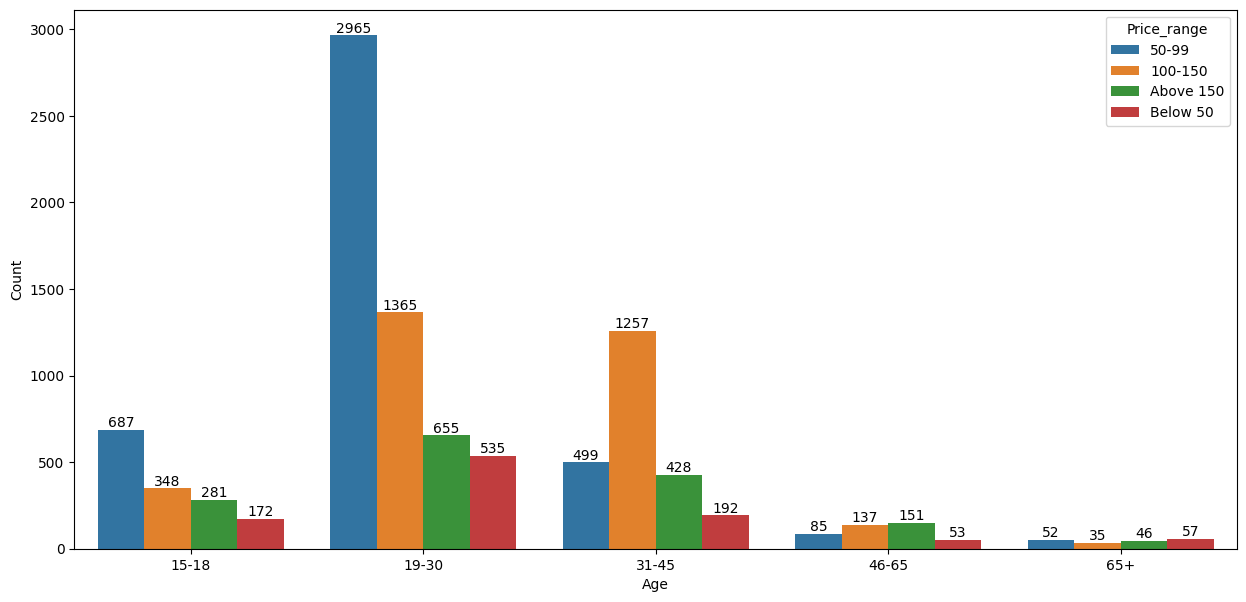

In [49]:
Price_range
data =df.groupby('Age')['Price_range'].value_counts().reset_index(name = "Count")
plt.figure(figsize= (15,7))
graph = sns.barplot(x = "Age",
            y ='Count',
            hue = "Price_range",
            data = data )

for i in range (len(data.Price_range.unique())):
  graph.bar_label(graph.containers[i])

plt.show()

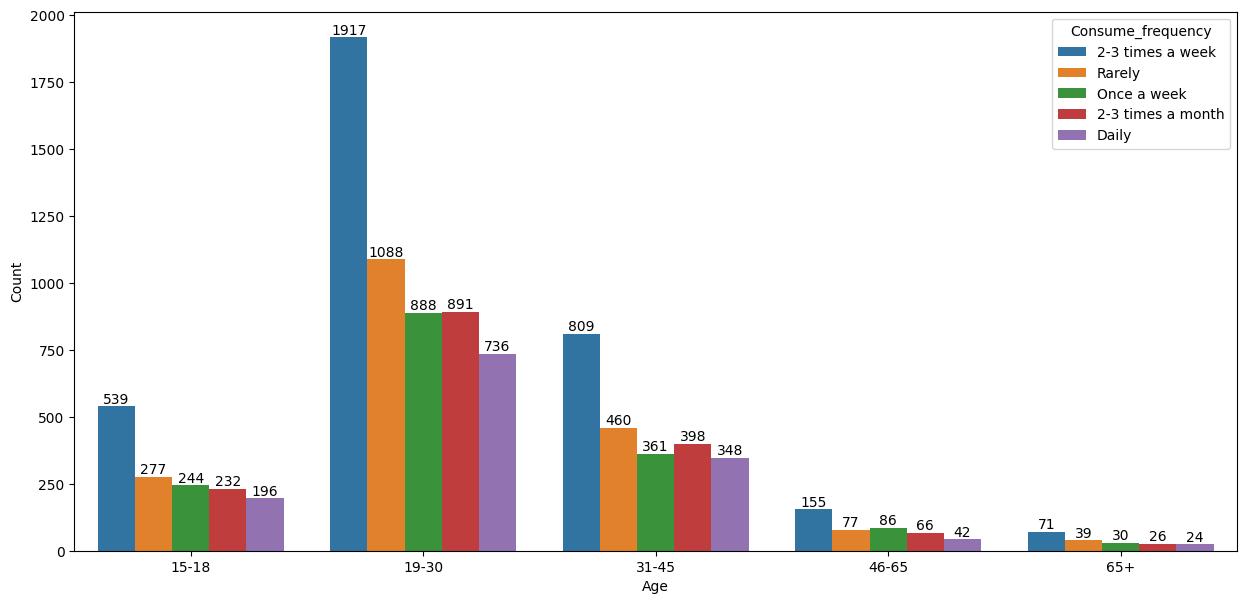

In [50]:
df.Consume_frequency.value_counts()
df.groupby('Age')['Consume_frequency'].value_counts().reset_index(name = "Count")

data =df.groupby('Age')['Consume_frequency'].value_counts().reset_index(name = "Count")
plt.figure(figsize= (15,7))
graph = sns.barplot(x = "Age",
            y ='Count',
            hue = "Consume_frequency",
            data = data )

for i in range (len(data.Consume_frequency.unique())):
  graph.bar_label(graph.containers[i])

plt.show()

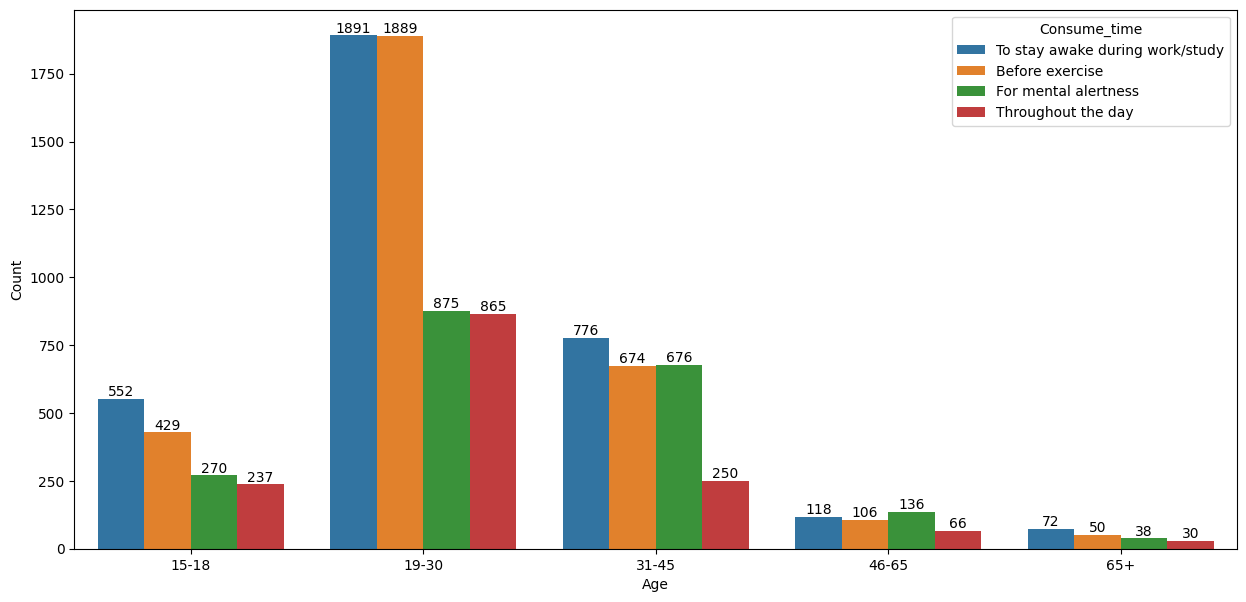

In [51]:
df.Consume_time.value_counts()

data =df.groupby('Age')['Consume_time'].value_counts().reset_index(name = "Count")
plt.figure(figsize= (15,7))
graph = sns.barplot(x = "Age",
            y ='Count',
            hue = "Consume_time",
            data = data )

for i in range (len(data.Consume_time.unique())):
  graph.bar_label(graph.containers[i])

plt.show()

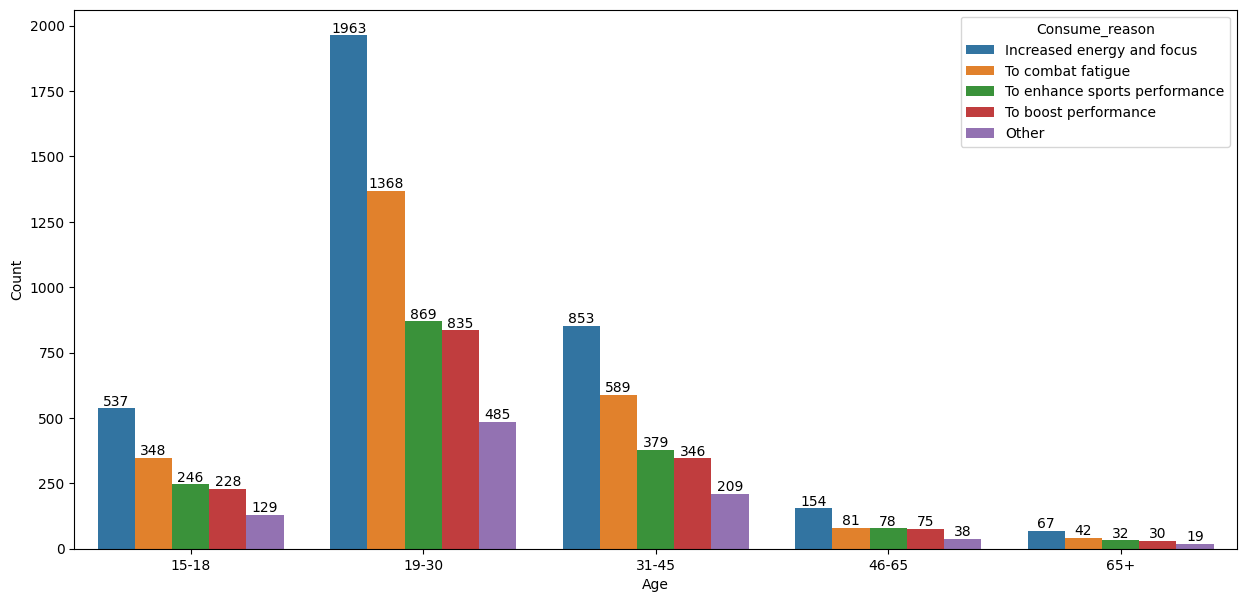

In [52]:
df.Consume_reason.value_counts()
data = df.groupby('Age')['Consume_reason'].value_counts().reset_index(name = "Count")
plt.figure(figsize= (15,7))
graph = sns.barplot(x = "Age",
            y ='Count',
            hue = "Consume_reason",
            data = data )

for i in range (len(data.Consume_reason.unique())):
  graph.bar_label(graph.containers[i])

plt.show()

Insights:-

*  We need to increase our product awareness as 50% of the people never heard about our product and also focus on increasing our availability in supermarkets as most of the customers buy energy drinks from supermarkets and also look into local shops and gym complexes we have seen that a most of the people consume energy drink for increasing the mental focus and stamina so local shops and gym complexes or shops near or in the sport complexes can increase the product sales.

*  In determining the ideal price, our analysis indicates that the majority of our target audience falls within the 15-30 age group. Within this demographic, a substantial number expresses a preference for a price range between 50-99 INR. Therefore, we propose setting the initial price at 99 INR, with the possibility of gradual increases over time

*  Our target customers primarily belong to the 15-30 age group. Individuals aged 15-20 are typically open to trying new products, provided we strategically position our offerings. For those in the 21-30 age range, many prioritize their careers and fitness. This demographic often consumes energy drinks during physical activities or late working hours to combat fatigue. We can emphasize in our advertising that our product contains vitamin C and Coffice to enhance productivity and energy levels

* In terms of brand ambassadors, we are considering two or more individuals. One option is a social media influencer, particularly a renowned YouTuber with a strong and positive influence on the younger audience—individuals such as Elvish Yadav or Fukra Inssan are noteworthy candidates. Additionally, we are exploring the possibility of collaborating with a popular Bollywood star known for their excellent physique.

* For our marketing campaigns, one potential strategy is to organize fan meet-ups in various cities, featuring local renowned YouTube celebrities. This approach allows us to connect with the audience on a more personal level and leverage the popularity of regional influencers.